In [3]:
import libraries as lib
import numpy as np
import matplotlib.pyplot


In [19]:
# Load data interactively using lib.DataUitzoekenGui
directory_2023 = "../../../OneDrive - HvA/Logfiles/SOLAR/2023/20230705-20230717_monaco_frankrijk_belgie_nederland/0101 - 20230715T080203 12h8m0s 87.721km Durnal - Bunde"
directory_2024 = "../../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240713_Huy-Limburg/0026 - 20240713T080342 14h37m16s 145.044km Durnal - Heel"

# Load datasets
print("Loading Julianakanaal 2023 data...")
result_2023 = lib.DataUitzoekenGui(directory_2023)
print("Loading Julianakanaal 2024 data...")
result_2024 = lib.DataUitzoekenGui(directory_2024)


Loading Julianakanaal 2023 data...


SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '1_Master_08_05.csv', '2_MPPT_0_05_05.csv', '3_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

Loading Julianakanaal 2024 data...


SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_07.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

In [32]:
# After loading the files and clicking the load button
# Check if 'merged_df' exists in results
if 'merged_df' in result_2023 and 'merged_df' in result_2024:
    merged_df_2023 = result_2023['merged_df'].copy()
    merged_df_2024 = result_2024['merged_df'].copy()
merged_df_2023

,1_Datalogger port,"1_Dataloggertijd, in s",1_Cycle count,1_Tijd,1_Latitude,1_Longitude,1_Snelheid over de grond in km/h,1_Richting van de snelheid,1_Datum,1_Magnetische variatie,...,2_Charge 4 stroom,2_Charge 5 spanning,2_Charge 5 stroom,2_Discharge 0 spanning,2_Discharge 0 stroom,2_Discharge 1 spanning,"2_I’m, welke accu ben ik",2_Format header (>09|03),2_aantal oplaadpaden,2_Discharge 1 stroom
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:01:08,1.0,68.43870,78.0640,60204.0,5020.1919,459.8912,0.0,0.0,150723.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:01:09,1.0,69.46610,79.0900,60205.0,5020.1919,459.8912,0.0,0.0,150723.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:01:10,1.0,70.43480,80.0580,60206.0,5020.1919,459.8912,0.0,0.0,150723.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:01:11,1.0,71.44320,81.0680,60207.0,5020.1919,459.8912,0.0,0.0,150723.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:01:12,1.0,72.47860,82.1020,60208.0,5020.1919,459.8912,0.0,0.0,150723.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 12:09:04,1.0,43743.50410,2775.4460,180959.0,5053.2542,542.7765,0.0,208.2,150723.0,NaN,...,0.4,-0.0315,29.5,0.6140,29.8,-0.03125,NaN,09|03,OV,B
0 days 12:09:05,1.0,43744.54100,2776.4820,181000.0,5053.2542,542.7765,0.0,208.2,150723.0,NaN,...,0.4,-0.0300,29.5,0.6170,29.8,-0.03200,NaN,09|03,OV,B
0 days 12:09:06,1.0,43746.01535,2777.9575,181001.5,5053.2542,542.7765,0.0,208.2,150723.0,NaN,...,0.4,-0.0310,29.5,0.6115,29.8,-0.03200,NaN,09|03,OV,B


In [46]:
# Filter out rows where latitude or longitude is 0 or NaN
merged_df_2023_clean = merged_df_2023.dropna(subset=['1_Latitude', '1_Longitude', '1_Snelheid tenopzichte van het water in Kilometers per uur'])

merged_df_2023_clean = merged_df_2023_clean[
    (merged_df_2023_clean['1_Latitude'] != 0) &
    (merged_df_2023_clean['1_Longitude'] != 0)
]

# Plot trajectory map for manual filtering
print("Plotting trajectory map for Julianakanaal 2023...")
lib.plot_trajectory_map(
    merged_df_2023_clean['1_Latitude'],
    merged_df_2023_clean['1_Longitude'],
    merged_df_2023_clean['1_Snelheid tenopzichte van het water in Kilometers per uur']
)


Plotting trajectory map for Julianakanaal 2023...


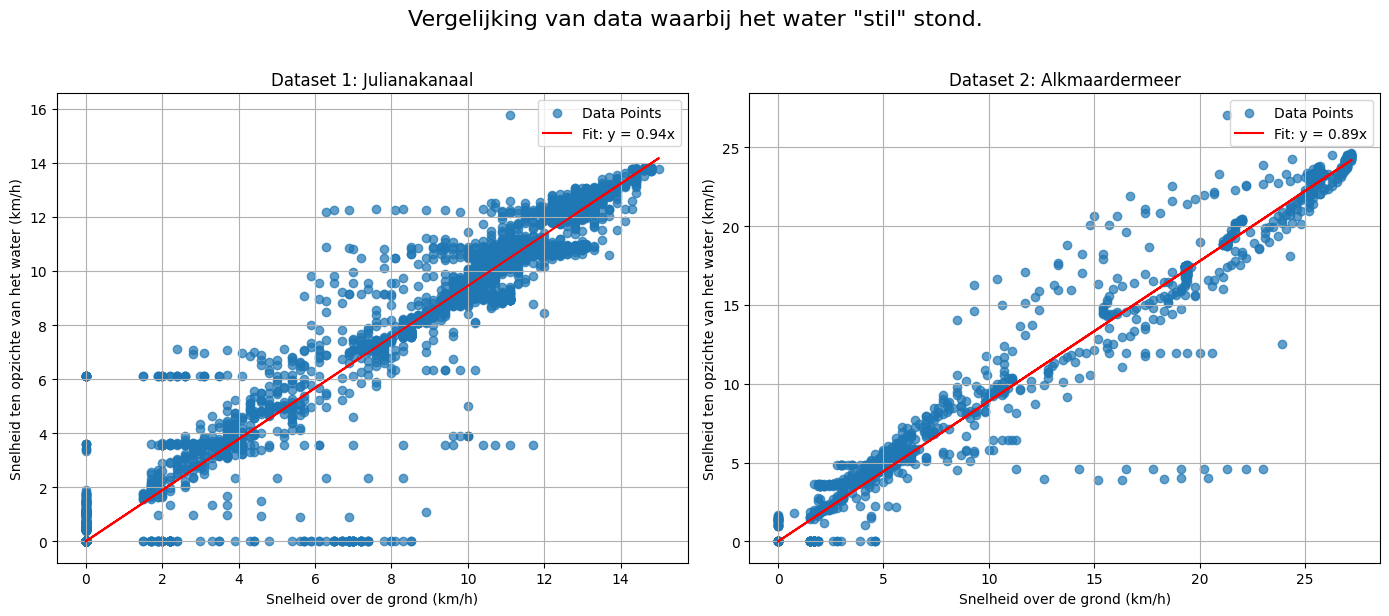

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Helper functions
def linear_model_through_origin(x, m):
    """Linear model through origin."""
    return m * x

def calculate_linear_fit(x, y):
    """Calculate linear fit through the origin."""
    popt, _ = curve_fit(linear_model_through_origin, x, y)
    return popt[0]  # Slope (m)

def plot_speeds(ax, x, y, title):
    """Plot speed over ground vs. speed relative to water."""
    if len(x) > 1:
        slope = calculate_linear_fit(x, y)
        y_fit = linear_model_through_origin(x, slope)
        ax.scatter(x, y, label='Data Points', alpha=0.7)
        ax.plot(x, y_fit, color='red', label=f'Fit: y = {slope:.2f}x')
        ax.set_title(title)
        ax.set_xlabel('Snelheid over de grond (km/h)')
        ax.set_ylabel('Snelheid ten opzichte van het water (km/h)')
        ax.legend()
        ax.grid(True)
    else:
        ax.text(0.5, 0.5, 'Not enough data', ha='center', va='center', fontsize=12)

# Extract data for plotting
x1, y1 = df1['1_Snelheid over de grond in km/h'], df1['1_Snelheid tenopzichte van het water in Kilometers per uur']
x2, y2 = df2['1_Snelheid over de grond in km/h'], df2['1_Snelheid tenopzichte van het water in Kilometers per uur']

# Create subplots for comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot data for each dataset
plot_speeds(axes[0], x1, y1, 'Dataset 1: Julianakanaal')
plot_speeds(axes[1], x2, y2, 'Dataset 2: Alkmaardermeer')

# Add a general title above the subplots
plt.suptitle('Vergelijking van data waarbij het water "stil" stond.', fontsize=16, y=1.02)

# Adjust layout to make room for the general title
plt.tight_layout()
plt.show()


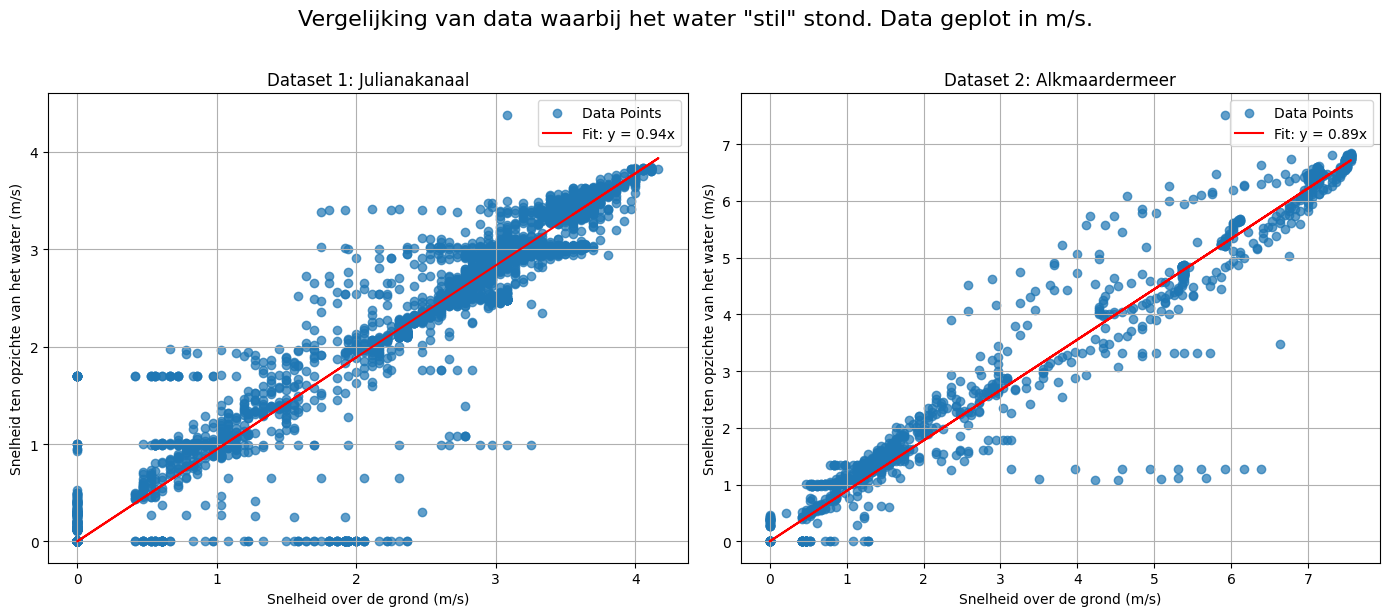

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Helper functions
def linear_model_through_origin(x, m):
    """Linear model through origin."""
    return m * x

def calculate_linear_fit(x, y):
    """Calculate linear fit through the origin."""
    popt, _ = curve_fit(linear_model_through_origin, x, y)
    return popt[0]  # Slope (m)

def plot_speeds(ax, x, y, title):
    """Plot speed over ground vs. speed relative to water."""
    if len(x) > 1:
        slope = calculate_linear_fit(x, y)
        y_fit = linear_model_through_origin(x, slope)
        ax.scatter(x, y, label='Data Points', alpha=0.7)
        ax.plot(x, y_fit, color='red', label=f'Fit: y = {slope:.2f}x')
        ax.set_title(title)
        ax.set_xlabel('Snelheid over de grond (m/s)')
        ax.set_ylabel('Snelheid ten opzichte van het water (m/s)')
        ax.legend()
        ax.grid(True)
    else:
        ax.text(0.5, 0.5, 'Not enough data', ha='center', va='center', fontsize=12)

# Convert speed data to m/s
def convert_to_mps(df):
    """Convert speed columns to m/s."""
    df['1_Speed_over_ground_m/s'] = df['1_Snelheid over de grond in km/h'] / 3.6
    df['1_Speed_relative_to_water_m/s'] = df['1_Snelheid tenopzichte van het water in Kilometers per uur'] / 3.6
    return df

# Convert both datasets to m/s
df1 = convert_to_mps(df1)
df2 = convert_to_mps(df2)

# Extract data for plotting in m/s
x1, y1 = df1['1_Speed_over_ground_m/s'], df1['1_Speed_relative_to_water_m/s']
x2, y2 = df2['1_Speed_over_ground_m/s'], df2['1_Speed_relative_to_water_m/s']

# Create subplots for comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot data for each dataset
plot_speeds(axes[0], x1, y1, 'Dataset 1: Julianakanaal')
plot_speeds(axes[1], x2, y2, 'Dataset 2: Alkmaardermeer')

# Add a general title above the subplots
plt.suptitle('Vergelijking van data waarbij het water "stil" stond. Data geplot in m/s.', fontsize=16, y=1.02)

# Adjust layout to make room for the general title
plt.tight_layout()
plt.show()


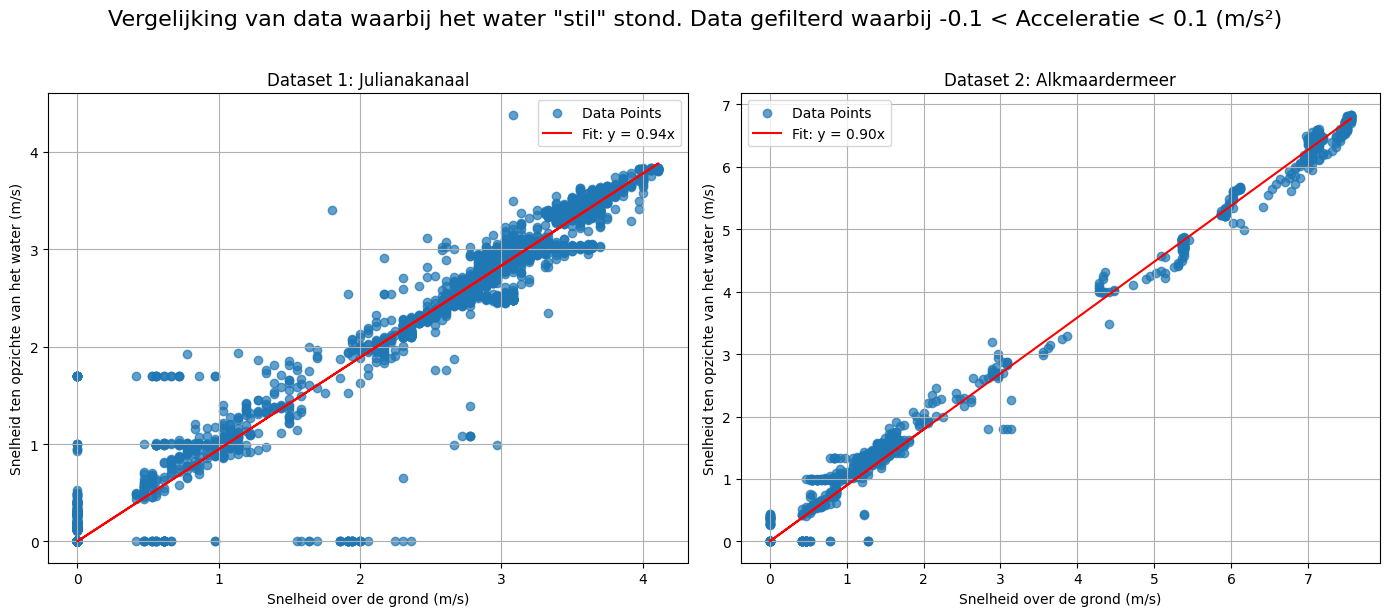

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Helper functions
def linear_model_through_origin(x, m):
    """Linear model through origin."""
    return m * x

def calculate_linear_fit(x, y):
    """Calculate linear fit through the origin."""
    popt, _ = curve_fit(linear_model_through_origin, x, y)
    return popt[0]  # Slope (m)

def plot_speeds(ax, x, y, title):
    """Plot speed over ground vs. speed relative to water."""
    if len(x) > 1:
        slope = calculate_linear_fit(x, y)
        y_fit = linear_model_through_origin(x, slope)
        ax.scatter(x, y, label='Data Points', alpha=0.7)
        ax.plot(x, y_fit, color='red', label=f'Fit: y = {slope:.2f}x')
        ax.set_title(title)
        ax.set_xlabel('Snelheid over de grond (m/s)')
        ax.set_ylabel('Snelheid ten opzichte van het water (m/s)')
        ax.legend()
        ax.grid(True)
    else:
        ax.text(0.5, 0.5, 'Not enough data', ha='center', va='center', fontsize=12)

# Preprocess data
def preprocess_data(df):
    """Convert speed to m/s and calculate acceleration."""
    # Convert speed over ground and relative to water to m/s
    df['1_Speed_over_ground_m/s'] = df['1_Snelheid over de grond in km/h'] / 3.6
    df['1_Speed_relative_to_water_m/s'] = df['1_Snelheid tenopzichte van het water in Kilometers per uur'] / 3.6

    # Calculate acceleration as the difference in speed over ground
    df['1_Acceleration'] = df['1_Speed_over_ground_m/s'].diff()

    # Filter the data where -0.1 <= acceleration <= 0.1
    filtered_df = df[(df['1_Acceleration'] > -0.1) & (df['1_Acceleration'] < 0.1)]

    return filtered_df

# Preprocess both datasets
df1_filtered = preprocess_data(df1)
df2_filtered = preprocess_data(df2)

# Extract filtered data for plotting (in m/s)
x1, y1 = df1_filtered['1_Speed_over_ground_m/s'], df1_filtered['1_Speed_relative_to_water_m/s']
x2, y2 = df2_filtered['1_Speed_over_ground_m/s'], df2_filtered['1_Speed_relative_to_water_m/s']

# Create subplots for comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot data for each dataset
plot_speeds(axes[0], x1, y1, 'Dataset 1: Julianakanaal')
plot_speeds(axes[1], x2, y2, 'Dataset 2: Alkmaardermeer')

# Add a general title above the subplots
plt.suptitle('Vergelijking van data waarbij het water "stil" stond. Data gefilterd waarbij -0.1 < Acceleratie < 0.1 (m/s²)', 
             fontsize=16, y=1.02)

# Adjust layout to make room for the general title
plt.tight_layout()
plt.show()


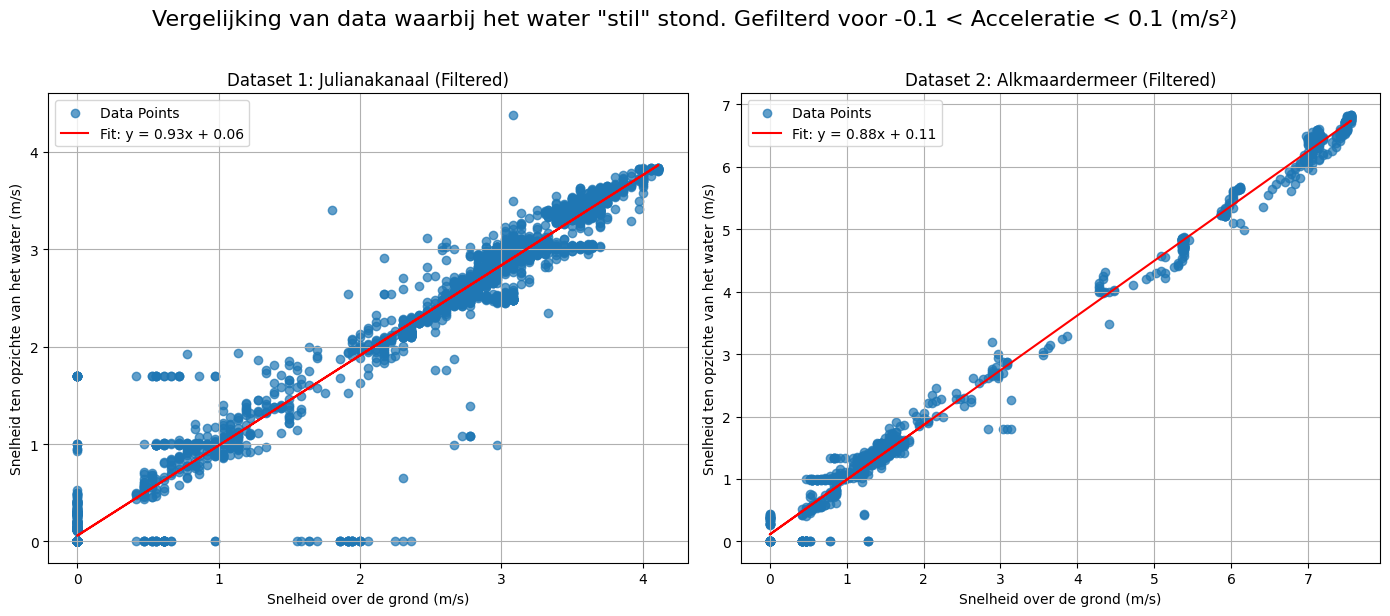

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Helper functions
def calculate_linear_fit_unconstrained(x, y):
    """Calculate linear fit without constraint to pass through origin."""
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return slope, intercept

def plot_speeds_with_unconstrained_fit(ax, x, y, title):
    """Plot speed over ground vs. speed relative to water with unconstrained fit."""
    if len(x) > 1:
        slope, intercept = calculate_linear_fit_unconstrained(x, y)
        y_fit = slope * x + intercept
        ax.scatter(x, y, label='Data Points', alpha=0.7)
        ax.plot(x, y_fit, color='red', label=f'Fit: y = {slope:.2f}x + {intercept:.2f}')
        ax.set_title(title)
        ax.set_xlabel('Snelheid over de grond (m/s)')
        ax.set_ylabel('Snelheid ten opzichte van het water (m/s)')
        ax.legend()
        ax.grid(True)
    else:
        ax.text(0.5, 0.5, 'Not enough data', ha='center', va='center', fontsize=12)

# Preprocess data
def preprocess_data(df):
    """Convert speed to m/s and calculate acceleration for filtering."""
    # Convert speed over ground and relative to water to m/s
    df['1_Speed_over_ground_m/s'] = df['1_Snelheid over de grond in km/h'] / 3.6
    df['1_Speed_relative_to_water_m/s'] = df['1_Snelheid tenopzichte van het water in Kilometers per uur'] / 3.6

    # Calculate acceleration as the difference in speed over ground
    df['1_Acceleration'] = df['1_Speed_over_ground_m/s'].diff()

    # Filter the data where -0.1 <= acceleration <= 0.1
    filtered_df = df[(df['1_Acceleration'] > -0.1) & (df['1_Acceleration'] < 0.1)]

    return filtered_df

# Preprocess both datasets
df1_filtered = preprocess_data(df1)
df2_filtered = preprocess_data(df2)

# Extract filtered data for plotting (in m/s)
x1, y1 = df1_filtered['1_Speed_over_ground_m/s'], df1_filtered['1_Speed_relative_to_water_m/s']
x2, y2 = df2_filtered['1_Speed_over_ground_m/s'], df2_filtered['1_Speed_relative_to_water_m/s']

# Create subplots for comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot data with unconstrained fit for each dataset
plot_speeds_with_unconstrained_fit(axes[0], x1, y1, 'Dataset 1: Julianakanaal (Filtered)')
plot_speeds_with_unconstrained_fit(axes[1], x2, y2, 'Dataset 2: Alkmaardermeer (Filtered)')

# Add a general title above the subplots
plt.suptitle('Vergelijking van data waarbij het water "stil" stond. Gefilterd voor -0.1 < Acceleratie < 0.1 (m/s²)', 
             fontsize=16, y=1.02)

# Adjust layout to make room for the general title
plt.tight_layout()
plt.show()
